- MNIST with Tensorflow
- MNIST with PyTorch
- MNIST with PySpark

# MNIST with Tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten 
from tensorflow.keras.datasets import mnist
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import sklearn
from sklearn.metrics import roc_auc_score 
import mlflow
import mlflow.tensorflow
print("TensorFlow: {}".format(tf.__version__))
print("Scikit-Learn: {}".format(sklearn.__version__))
print("Numpy: {}".format(np.__version__))
print("MLFlow: {}".format(mlflow.__version__))
print("Matplotlib: {}".format(matplotlib.__version__))

TensorFlow: 2.6.0
Scikit-Learn: 0.24.2
Numpy: 1.19.5
MLFlow: 1.20.2
Matplotlib: 3.4.3


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


Class:  5


(<matplotlib.image.AxesImage at 0x7fb3282f6280>, None)

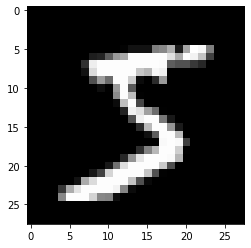

In [5]:
plt.imshow(x_train[0], cmap='gray'), print("Class: ", y_train[0])

In [6]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
print("Shapes")
print("x_train: {}\ny_train: {}".format(x_train.shape, y_train.shape))
print("x_test: {}\ny_test: {}".format(x_test.shape, y_test.shape))

Shapes
x_train: (60000, 28, 28, 1)
y_train: (60000, 10)
x_test: (10000, 28, 28, 1)
y_test: (10000, 10)


In [8]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, strides=2,
padding='same', input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(filters=8, kernel_size=3, strides=2,
padding='same', input_shape=(28, 28, 1), activation="relu"))
model.add(Flatten())
model.add(Dense(30, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                11790     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 13,940
Trainable params: 13,940
Non-trainable params: 0
____________________________________________________

2021-10-03 23:21:33.131885: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
mlflow.set_experiment("TF_Keras_MNIST") 

with mlflow.start_run():
    mlflow.tensorflow.autolog()
    model.fit(x=x_train, y=y_train, batch_size=256, epochs=10)
    preds = model.predict(x_test)
    preds = np.round(preds)
    eval_acc = model.evaluate(x_test, y_test)[1]
    auc_score = roc_auc_score(y_test, preds)
    print("eval_acc: ", eval_acc)
    print("auc_score: ", auc_score)
    mlflow.tensorflow.mlflow.log_metric("eval_acc", eval_acc)
    mlflow.tensorflow.mlflow.log_metric("auc_score", auc_score)

mlflow.end_run()

INFO: 'TF_Keras_MNIST' does not exist. Creating a new experiment


2021-10-03 23:22:41.165777: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-03 23:22:41.165798: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-03 23:22:41.165968: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-03 23:22:41.236992: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
 17/235 [=>............................] - ETA: 2s - loss: 5.2487 - accuracy: 0.1852

2021-10-03 23:22:41.712095: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-03 23:22:41.712112: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-03 23:22:41.722277: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-03 23:22:41.723587: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-03 23:22:41.726489: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /var/folders/yc/l505mhd94ws7bth73k_v0xkr0000gn/T/tmp5srbd9dk/train/plugins/profile/2021_10_03_23_22_41

2021-10-03 23:22:41.727307: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /var/folders/yc/l505mhd94ws7bth73k_v0xkr0000gn/T/tmp5srbd9dk/train/plugins/profile/2021_10_03_23_22_41/Dongs-MBP.trace.json.gz
2021-10-03 23:22:41.730053: I tensorflow/core/profiler/rpc/client/save_prof

235/235 [==============================] - 3s 10ms/step - loss: 1.2461 - accuracy: 0.6704
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.2943 - accuracy: 0.9145
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1821 - accuracy: 0.9459
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1335 - accuracy: 0.9599
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1049 - accuracy: 0.9686
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0858 - accuracy: 0.9740
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0741 - accuracy: 0.9774
Epoch 8/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0640 - accuracy: 0.9794
Epoch 9/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0569 - accuracy: 0.9821
Epoch 10/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0509 - accuracy: 0.9838


2021-10-03 23:23:08.049902: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/yc/l505mhd94ws7bth73k_v0xkr0000gn/T/tmph90a0xfp/model/data/model/assets
313/313 [==============================] - 0s 901us/step - loss: 0.0829 - accuracy: 0.9777
eval_acc:  0.9776999950408936
auc_score:  0.987290041921062


In [12]:
loaded_model = mlflow.keras.load_model("runs:/6bbe24715ff64fc7b9227c86cfdfa15e/model")

In [13]:
eval_loss, eval_acc = loaded_model.evaluate(x_test, y_test)
preds = loaded_model.predict(x_test)
preds = np.round(preds)
eval_auc = roc_auc_score(y_test, preds)
print("Eval Loss:", eval_loss)
print("Eval Acc:", eval_acc)
print("Eval AUC:", eval_auc)

313/313 [==============================] - 0s 927us/step - loss: 0.0829 - accuracy: 0.9777
Eval Loss: 0.08294501155614853
Eval Acc: 0.9776999950408936
Eval AUC: 0.987290041921062


# MLFlow with PyTorch

In [17]:
import torch
import torch.nn as nn
from torch.utils import data
import torchvision
import torchvision.datasets
import sklearn
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np 
import mlflow
import mlflow.pytorch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [19]:
print("PyTorch: {}".format(torch.__version__))
print("torchvision: {}".format(torchvision.__version__))
print("sklearn: {}".format(sklearn.__version__))
print("MLFlow: {}".format(mlflow.__version__))
print("Numpy: {}".format(np.__version__))
print("Device: ", device)

PyTorch: 1.9.0
torchvision: 0.10.1
sklearn: 0.24.2
MLFlow: 1.20.2
Numpy: 1.19.5
Device:  cpu


In [20]:
batch_size = 256
num_classes = 10
learning_rate = 0.001

In [21]:
train_set = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=None)
test_set = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=None)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [30]:
x_train, y_train = train_set.data, train_set.targets
x_test, y_test = test_set.data, test_set.targets

In [31]:
x_train.shape

torch.Size([60000, 28, 28])

In [32]:
y_train.shape

torch.Size([60000])

In [33]:
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1], x_test.shape[2])

In [34]:
x_train.shape, x_test.shape

(torch.Size([60000, 1, 28, 28]), torch.Size([10000, 1, 28, 28]))

In [35]:
y_train[0]

tensor(5)

In [37]:
def to_one_hot(num_classes, labels):
    one_hot = torch.zeros(([labels.shape[0], num_classes])) 
    
    for f in range(len(labels)):
        one_hot[f][labels[f]] = 1 
        
    return one_hot

In [38]:
y_train = to_one_hot(num_classes, y_train)
y_test = to_one_hot(num_classes, y_test)

In [40]:
y_train.shape, y_test.shape

(torch.Size([60000, 10]), torch.Size([10000, 10]))

In [41]:
print("Shapes")
print("x_train: {}\ny_train: {}".format(x_train.shape, y_train.shape))
print("x_test: {}\ny_test: {}".format(x_test.shape, y_test.shape))

Shapes
x_train: torch.Size([60000, 1, 28, 28])
y_train: torch.Size([60000, 10])
x_test: torch.Size([10000, 1, 28, 28])
y_test: torch.Size([10000, 10])


In [42]:
class model(nn.Module): 
    
    def __init__(self):
        super(model, self).__init__()
        # IN 1x28x28 OUT 16x14x14
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=2, padding=1, dilation=1)
        # IN 16x14x14 OUT 32x6x6
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=0, dilation=1)
        # IN 32x6x6 OUT 64x2x2
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=0, dilation=1)
        # IN 64x2x2 OUT 256
        self.flat1 = nn.Flatten()
        self.dense1 = nn.Linear(in_features=256, out_features=128)
        self.dense2 = nn.Linear(in_features=128, out_features=64)
        self.dense3 = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, x): 
        x = self.conv1(x) 
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = self.conv3(x)
        x = nn.ReLU()(x)
        x = self.flat1(x)
        x = self.dense1(x)
        x = nn.ReLU()(x)
        x = self.dense2(x)
        x = nn.ReLU()(x)
        x = self.dense3(x)
        x = nn.Softmax()(x)
        
        return x

In [43]:
model = model().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

In [44]:
dataset = data.TensorDataset(x_train,y_train)
train_loader = data.DataLoader(dataset, batch_size=batch_size)

In [46]:
num_epochs = 5

for f in range(num_epochs):
    for batch_num, minibatch in enumerate(train_loader): 
        minibatch_x, minibatch_y = minibatch[0], minibatch[1]
        
        output = model.forward(torch.Tensor(minibatch_x.float()))
        loss = criterion(output, torch.Tensor(minibatch_y.float()))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(f"Epoch {f} Batch_Num {batch_num} Loss {loss}")

/var/folders/yc/l505mhd94ws7bth73k_v0xkr0000gn/T/ipykernel_49784/2121290085.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = nn.Softmax()(x)


Epoch 0 Batch_Num 0 Loss 0.3450171649456024
Epoch 0 Batch_Num 1 Loss 0.30535024404525757
Epoch 0 Batch_Num 2 Loss 0.28882020711898804
Epoch 0 Batch_Num 3 Loss 0.27001768350601196
Epoch 0 Batch_Num 4 Loss 0.24854028224945068
Epoch 0 Batch_Num 5 Loss 0.22579574584960938
Epoch 0 Batch_Num 6 Loss 0.1939469277858734
Epoch 0 Batch_Num 7 Loss 0.16799435019493103
Epoch 0 Batch_Num 8 Loss 0.14004436135292053
Epoch 0 Batch_Num 9 Loss 0.14111243188381195
Epoch 0 Batch_Num 10 Loss 0.1172834187746048
Epoch 0 Batch_Num 11 Loss 0.10994525998830795
Epoch 0 Batch_Num 12 Loss 0.10731685161590576
Epoch 0 Batch_Num 13 Loss 0.1146308034658432
Epoch 0 Batch_Num 14 Loss 0.11636199802160263
Epoch 0 Batch_Num 15 Loss 0.09150653332471848
Epoch 0 Batch_Num 16 Loss 0.11010614782571793
Epoch 0 Batch_Num 17 Loss 0.10004089027643204
Epoch 0 Batch_Num 18 Loss 0.10506093502044678
Epoch 0 Batch_Num 19 Loss 0.09705551713705063
Epoch 0 Batch_Num 20 Loss 0.10725440829992294
Epoch 0 Batch_Num 21 Loss 0.06830598413944244
Ep

Epoch 0 Batch_Num 176 Loss 0.015677234157919884
Epoch 0 Batch_Num 177 Loss 0.020107442513108253
Epoch 0 Batch_Num 178 Loss 0.028509825468063354
Epoch 0 Batch_Num 179 Loss 0.0254000723361969
Epoch 0 Batch_Num 180 Loss 0.0465630404651165
Epoch 0 Batch_Num 181 Loss 0.02171119675040245
Epoch 0 Batch_Num 182 Loss 0.022864174097776413
Epoch 0 Batch_Num 183 Loss 0.02781274914741516
Epoch 0 Batch_Num 184 Loss 0.03190147131681442
Epoch 0 Batch_Num 185 Loss 0.026436885818839073
Epoch 0 Batch_Num 186 Loss 0.019762489944696426
Epoch 0 Batch_Num 187 Loss 0.021450847387313843
Epoch 0 Batch_Num 188 Loss 0.014787012711167336
Epoch 0 Batch_Num 189 Loss 0.015613983385264874
Epoch 0 Batch_Num 190 Loss 0.0132725415751338
Epoch 0 Batch_Num 191 Loss 0.04278307780623436
Epoch 0 Batch_Num 192 Loss 0.022091522812843323
Epoch 0 Batch_Num 193 Loss 0.03883367404341698
Epoch 0 Batch_Num 194 Loss 0.02798197790980339
Epoch 0 Batch_Num 195 Loss 0.020014073699712753
Epoch 0 Batch_Num 196 Loss 0.03847440704703331
Epoch

Epoch 1 Batch_Num 120 Loss 0.016568202525377274
Epoch 1 Batch_Num 121 Loss 0.01573582924902439
Epoch 1 Batch_Num 122 Loss 0.01425081305205822
Epoch 1 Batch_Num 123 Loss 0.021069318056106567
Epoch 1 Batch_Num 124 Loss 0.019147804006934166
Epoch 1 Batch_Num 125 Loss 0.01673278585076332
Epoch 1 Batch_Num 126 Loss 0.025724321603775024
Epoch 1 Batch_Num 127 Loss 0.004336982499808073
Epoch 1 Batch_Num 128 Loss 0.01439958531409502
Epoch 1 Batch_Num 129 Loss 0.013230107724666595
Epoch 1 Batch_Num 130 Loss 0.021241944283246994
Epoch 1 Batch_Num 131 Loss 0.013282785192131996
Epoch 1 Batch_Num 132 Loss 0.008129538036882877
Epoch 1 Batch_Num 133 Loss 0.006858639419078827
Epoch 1 Batch_Num 134 Loss 0.024773910641670227
Epoch 1 Batch_Num 135 Loss 0.024461552500724792
Epoch 1 Batch_Num 136 Loss 0.014338038861751556
Epoch 1 Batch_Num 137 Loss 0.01681116409599781
Epoch 1 Batch_Num 138 Loss 0.012148609384894371
Epoch 1 Batch_Num 139 Loss 0.008343199267983437
Epoch 1 Batch_Num 140 Loss 0.0201059337705373

Epoch 2 Batch_Num 63 Loss 0.012147665955126286
Epoch 2 Batch_Num 64 Loss 0.007806837558746338
Epoch 2 Batch_Num 65 Loss 0.011053631082177162
Epoch 2 Batch_Num 66 Loss 0.012346558272838593
Epoch 2 Batch_Num 67 Loss 0.009858084842562675
Epoch 2 Batch_Num 68 Loss 0.01796852797269821
Epoch 2 Batch_Num 69 Loss 0.01926177181303501
Epoch 2 Batch_Num 70 Loss 0.008532140403985977
Epoch 2 Batch_Num 71 Loss 0.01133252028375864
Epoch 2 Batch_Num 72 Loss 0.008170096203684807
Epoch 2 Batch_Num 73 Loss 0.008593777194619179
Epoch 2 Batch_Num 74 Loss 0.012897376902401447
Epoch 2 Batch_Num 75 Loss 0.01243826188147068
Epoch 2 Batch_Num 76 Loss 0.009566245600581169
Epoch 2 Batch_Num 77 Loss 0.008790583349764347
Epoch 2 Batch_Num 78 Loss 0.016795076429843903
Epoch 2 Batch_Num 79 Loss 0.01144393254071474
Epoch 2 Batch_Num 80 Loss 0.007827209308743477
Epoch 2 Batch_Num 81 Loss 0.009407171979546547
Epoch 2 Batch_Num 82 Loss 0.00950551126152277
Epoch 2 Batch_Num 83 Loss 0.00976281426846981
Epoch 2 Batch_Num 84

Epoch 3 Batch_Num 4 Loss 0.009663241915404797
Epoch 3 Batch_Num 5 Loss 0.015455113723874092
Epoch 3 Batch_Num 6 Loss 0.010396640747785568
Epoch 3 Batch_Num 7 Loss 0.006710626184940338
Epoch 3 Batch_Num 8 Loss 0.008042609319090843
Epoch 3 Batch_Num 9 Loss 0.0041933138854801655
Epoch 3 Batch_Num 10 Loss 0.013832745142281055
Epoch 3 Batch_Num 11 Loss 0.007156206760555506
Epoch 3 Batch_Num 12 Loss 0.003021755488589406
Epoch 3 Batch_Num 13 Loss 0.008863684721291065
Epoch 3 Batch_Num 14 Loss 0.01178536843508482
Epoch 3 Batch_Num 15 Loss 0.005417768843472004
Epoch 3 Batch_Num 16 Loss 0.0032446631230413914
Epoch 3 Batch_Num 17 Loss 0.007614149246364832
Epoch 3 Batch_Num 18 Loss 0.006409155670553446
Epoch 3 Batch_Num 19 Loss 0.015047302469611168
Epoch 3 Batch_Num 20 Loss 0.010636495426297188
Epoch 3 Batch_Num 21 Loss 0.004201277159154415
Epoch 3 Batch_Num 22 Loss 0.016162442043423653
Epoch 3 Batch_Num 23 Loss 0.005925881676375866
Epoch 3 Batch_Num 24 Loss 0.007545657455921173
Epoch 3 Batch_Num 

Epoch 3 Batch_Num 179 Loss 0.014331248588860035
Epoch 3 Batch_Num 180 Loss 0.013866022229194641
Epoch 3 Batch_Num 181 Loss 0.01050182618200779
Epoch 3 Batch_Num 182 Loss 0.005698611494153738
Epoch 3 Batch_Num 183 Loss 0.004127605818212032
Epoch 3 Batch_Num 184 Loss 0.015164142474532127
Epoch 3 Batch_Num 185 Loss 0.012089858762919903
Epoch 3 Batch_Num 186 Loss 0.010891219601035118
Epoch 3 Batch_Num 187 Loss 0.006501484662294388
Epoch 3 Batch_Num 188 Loss 0.005093714222311974
Epoch 3 Batch_Num 189 Loss 0.0015354815404862165
Epoch 3 Batch_Num 190 Loss 0.0011830620933324099
Epoch 3 Batch_Num 191 Loss 0.01170666329562664
Epoch 3 Batch_Num 192 Loss 0.00863683968782425
Epoch 3 Batch_Num 193 Loss 0.014068658463656902
Epoch 3 Batch_Num 194 Loss 0.006238905247300863
Epoch 3 Batch_Num 195 Loss 0.005628342740237713
Epoch 3 Batch_Num 196 Loss 0.014674303121864796
Epoch 3 Batch_Num 197 Loss 0.004165785852819681
Epoch 3 Batch_Num 198 Loss 0.008435399271547794
Epoch 3 Batch_Num 199 Loss 0.003069859696

Epoch 4 Batch_Num 122 Loss 0.0053812176920473576
Epoch 4 Batch_Num 123 Loss 0.008988218382000923
Epoch 4 Batch_Num 124 Loss 0.005872935988008976
Epoch 4 Batch_Num 125 Loss 0.0075286077335476875
Epoch 4 Batch_Num 126 Loss 0.01389746367931366
Epoch 4 Batch_Num 127 Loss 0.004240592010319233
Epoch 4 Batch_Num 128 Loss 0.0038061223458498716
Epoch 4 Batch_Num 129 Loss 0.0015015447279438376
Epoch 4 Batch_Num 130 Loss 0.00677782017737627
Epoch 4 Batch_Num 131 Loss 0.003685213625431061
Epoch 4 Batch_Num 132 Loss 0.0026299457531422377
Epoch 4 Batch_Num 133 Loss 0.004336022771894932
Epoch 4 Batch_Num 134 Loss 0.010173095390200615
Epoch 4 Batch_Num 135 Loss 0.00703784916549921
Epoch 4 Batch_Num 136 Loss 0.007286728825420141
Epoch 4 Batch_Num 137 Loss 0.008681156672537327
Epoch 4 Batch_Num 138 Loss 0.0125799011439085
Epoch 4 Batch_Num 139 Loss 0.0054532615467906
Epoch 4 Batch_Num 140 Loss 0.003713936312124133
Epoch 4 Batch_Num 141 Loss 0.003910969011485577
Epoch 4 Batch_Num 142 Loss 0.0085898926481

In [49]:
mlflow.set_experiment("PyTorch_MNIST") 

with mlflow.start_run():
    preds = model.forward(torch.Tensor(x_test.float()))
    preds = np.round(preds.detach().cpu().numpy())
    
    eval_acc = accuracy_score(y_test, preds)
    auc_score = roc_auc_score(y_test, preds)
    
    mlflow.log_param("batch_size", batch_size)
    mlflow.log_param("num_epochs", num_epochs)
    mlflow.log_param("learning_rate", learning_rate)
    
    mlflow.log_metric("eval_acc", eval_acc)
    mlflow.log_metric("auc_score", auc_score)
    
    print("eval_acc: ", eval_acc)
    print("auc_score: ", auc_score)
    mlflow.pytorch.log_model(model, "PyTorch_MNIST")
    
mlflow.end_run()

/var/folders/yc/l505mhd94ws7bth73k_v0xkr0000gn/T/ipykernel_49784/2121290085.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = nn.Softmax()(x)


eval_acc:  0.9779
auc_score:  0.9878326743081736


In [50]:
loaded_model = mlflow.pytorch.load_model("runs:/5baeb13b3b29422f98ab87a712677199/PyTorch_MNIST")

In [51]:
preds = loaded_model.forward(torch.Tensor(x_test.float()))
preds = np.round(preds.detach().cpu().numpy())
eval_acc = accuracy_score(y_test, preds)
auc_score = roc_auc_score(y_test, preds)
print("eval_acc: ", eval_acc)
print("auc_score: ", auc_score)

eval_acc:  0.9779
auc_score:  0.9878326743081736


/var/folders/yc/l505mhd94ws7bth73k_v0xkr0000gn/T/ipykernel_49784/2121290085.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = nn.Softmax()(x)


# MLFlow with PySpark

In [53]:
import pyspark #
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression 
import pyspark.sql.functions as F
import os
import seaborn as sns
import sklearn #
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib #
import matplotlib.pyplot as plt
import mlflow 
import mlflow.spark

In [55]:
os.environ["SPARK_LOCAL_IP"]='127.0.0.1'
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.sparkContext._conf.getAll()
print("pyspark: {}".format(pyspark.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("seaborn: {}".format(sns.__version__))
print("sklearn: {}".format(sklearn.__version__))
print("mlflow: {}".format(mlflow.__version__))

21/10/03 23:52:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/10/03 23:52:58 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


pyspark: 3.1.2
matplotlib: 3.4.3
seaborn: 0.11.2
sklearn: 0.24.2
mlflow: 1.20.2


In [57]:
data_path = 'data/creditcard.csv'
df = spark.read.csv(data_path, header = True, inferSchema = True)
labelColumn = "Class"
columns = df.columns
numericCols = columns
numericCols.remove("Time")
numericCols.remove(labelColumn)
print(numericCols)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [58]:
df.toPandas().head()

21/10/03 23:53:46 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [59]:
stages = []
assemblerInputs =  numericCols
assembler = VectorAssembler(inputCols=assemblerInputs,outputCol="features")
stages += [assembler]
dfFeatures = df.select(F.col(labelColumn).alias('label'), *numericCols )
normal = dfFeatures.filter("Class == 0"). sample(withReplacement=False, fraction=0.5, seed=2020) 
anomaly = dfFeatures.filter("Class == 1")
normal_train, normal_test = normal.randomSplit([0.8, 0.2], seed = 2020)
anomaly_train, anomaly_test = anomaly.randomSplit([0.8, 0.2], seed = 2020)

In [60]:
dfFeatures.toPandas().head()

,label,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [61]:
train_set = normal_train.union(anomaly_train)
test_set = normal_test.union(anomaly_test)

In [62]:
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(dfFeatures)
train_set = pipelineModel.transform(train_set)
test_set = pipelineModel.transform(test_set)
selectedCols = ['label', 'features'] + numericCols
train_set = train_set.select(selectedCols)
test_set = test_set.select(selectedCols)
print("Training Dataset Count: ", train_set.count())
print("Test Dataset Count: ", test_set.count())

Training Dataset Count:  114161
Test Dataset Count:  28465


In [64]:
def train(spark_model, train_set): 
    trained_model = spark_model.fit(train_set)
    trainingSummary = trained_model.summary
    pyspark_auc_score = trainingSummary.areaUnderROC
    mlflow.log_metric("train_acc", trainingSummary.accuracy)
    mlflow.log_metric("train_AUC", pyspark_auc_score)
    print("Training Accuracy: ", trainingSummary.accuracy)
    print("Training AUC:", pyspark_auc_score)
    
    return trained_model

In [65]:
def evaluate(spark_model, test_set):
    
    evaluation_summary = spark_model.evaluate(test_set)
    
    eval_acc = evaluation_summary.accuracy
    eval_AUC = evaluation_summary.areaUnderROC
    
    mlflow.log_metric("eval_acc", eval_acc)
    mlflow.log_metric("eval_AUC", eval_AUC)
    
    print("Evaluation Accuracy: ", eval_acc)
    print("Evaluation AUC: ", eval_AUC)

In [66]:
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)

mlflow.set_experiment("PySpark_CreditCard") 

with mlflow.start_run():
    
    trainedLR = train(lr, train_set)
    evaluate(trainedLR, test_set)
    mlflow.spark.log_model(trainedLR, "creditcard_model_pyspark")
    
mlflow.end_run()

INFO: 'PySpark_CreditCard' does not exist. Creating a new experiment


21/10/04 00:36:06 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
21/10/04 00:36:06 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


Training Accuracy:  0.9988962955825544
Training AUC: 0.9803815205217594


Evaluation Accuracy:  0.9990163358510451
Evaluation AUC:  0.988471855115027


In [67]:
model = mlflow.spark.load_model("runs:/d2a6201c6d3d474cbec9828d4fda0dea/creditcard_model_pyspark")

2021/10/04 00:37:08 INFO mlflow.spark: 'runs:/d2a6201c6d3d474cbec9828d4fda0dea/creditcard_model_pyspark' resolved as 'file:///Users/dongzhang/Classes/mlflow/Kaggle/mlruns/6/d2a6201c6d3d474cbec9828d4fda0dea/artifacts/creditcard_model_pyspark'
2021/10/04 00:37:08 INFO mlflow.spark: File 'file:///Users/dongzhang/Classes/mlflow/Kaggle/mlruns/6/d2a6201c6d3d474cbec9828d4fda0dea/artifacts/creditcard_model_pyspark/sparkml' is already on DFS, copy is not necessary.


In [68]:
predictions = model.transform(test_set)
y_true = predictions.select(['label']).collect()
y_pred = predictions.select(['prediction']).collect()

In [69]:
print(f"AUC Score: {roc_auc_score(y_true, y_pred):.3%}")
print(f"Accuracy Score: {accuracy_score(y_true, y_pred):.3%}")

AUC Score: 89.429%
Accuracy Score: 99.902%


Text(0.5, 15.0, 'Predicted')

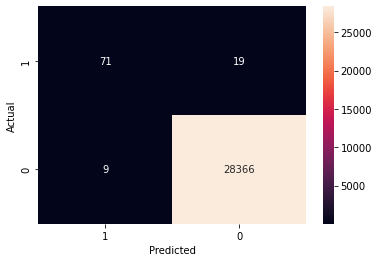

In [70]:
conf_matrix = confusion_matrix(y_true, y_pred)
ax = sns.heatmap(conf_matrix, annot=True,fmt='g') 
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Local Model Serving

In [74]:
# Deploying the Model

import pandas as pd 
import mlflow
import mlflow.sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import numpy as np 
import subprocess
import json